In [88]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [89]:
data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Spring 23/Predictive with SAS/Loan_Default.csv/Loan_Default.csv")

In [90]:
data=data[['loan_limit','loan_type','loan_purpose','rate_of_interest','property_value','income','Credit_Score','LTV','term','age','dtir1','Status']]

In [91]:
data.describe() 




,rate_of_interest,property_value,income,Credit_Score,LTV,term,dtir1,Status
count,112231.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148629.000000,124549.000000,148670.000000
mean,4.045476,4.978935e+05,6957.338876,699.789103,72.746457,335.136582,37.732932,0.246445
std,0.561391,3.599353e+05,6496.586382,115.875857,39.967603,58.409084,10.545435,0.430942
min,0.000000,8.000000e+03,0.000000,500.000000,0.967478,96.000000,5.000000,0.000000
25%,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,360.000000,31.000000,0.000000
50%,3.990000,4.180000e+05,5760.000000,699.000000,75.135870,360.000000,39.000000,0.000000
75%,4.375000,6.280000e+05,8520.000000,800.000000,86.184211,360.000000,45.000000,0.000000
max,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,360.000000,61.000000,1.000000


In [92]:
data.isnull().sum()

loan_limit           3344
loan_type               0
loan_purpose          134
rate_of_interest    36439
property_value      15098
income               9150
Credit_Score            0
LTV                 15098
term                   41
age                   200
dtir1               24121
Status                  0
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_limit        145326 non-null  object 
 1   loan_type         148670 non-null  object 
 2   loan_purpose      148536 non-null  object 
 3   rate_of_interest  112231 non-null  float64
 4   property_value    133572 non-null  float64
 5   income            139520 non-null  float64
 6   Credit_Score      148670 non-null  int64  
 7   LTV               133572 non-null  float64
 8   term              148629 non-null  float64
 9   age               148470 non-null  object 
 10  dtir1             124549 non-null  float64
 11  Status            148670 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 13.6+ MB


<AxesSubplot:>

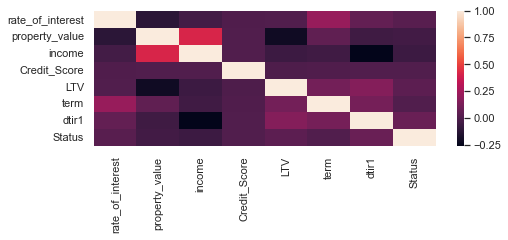

In [94]:
import seaborn as sns
sns.heatmap(data.corr())

In [95]:
data['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [96]:
data['Credit_Score'].max()

900

In [97]:
data['loan_type'].value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

In [98]:
data['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

<AxesSubplot:ylabel='Density'>

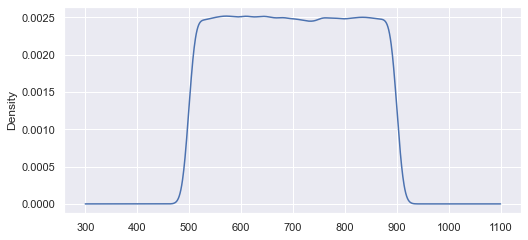

In [99]:
data['Credit_Score'].plot(kind='kde')

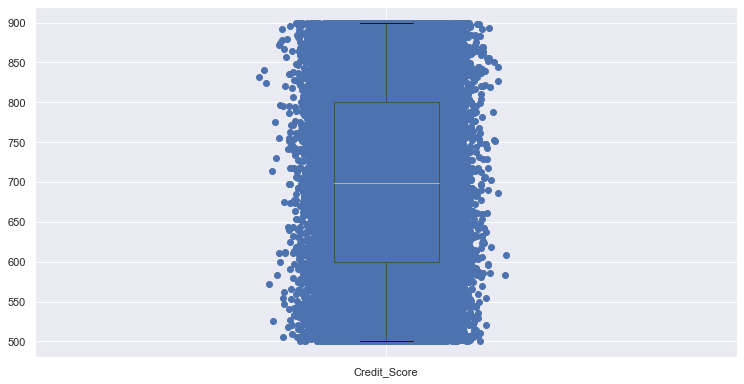

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.50, 5.50]
plt.rcParams["figure.autolayout"] = True
data_plot =data['Credit_Score'].to_frame()


data_plot.boxplot()
for i, d in enumerate(data_plot):
   y = data_plot[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(x, y)
plt.show()

In [101]:
def credit_screening(x):
    if x <=679:
        return 'poor'
    if x<=719 and x>680:
        return 'avg'
    if x<=849 and x>720:
        return 'good'
    else :
        return 'excellent'
data['bins']=data['Credit_Score'].apply(credit_screening)     

In [102]:
data['bins']=data['Credit_Score'].apply(credit_screening) 

<AxesSubplot:>

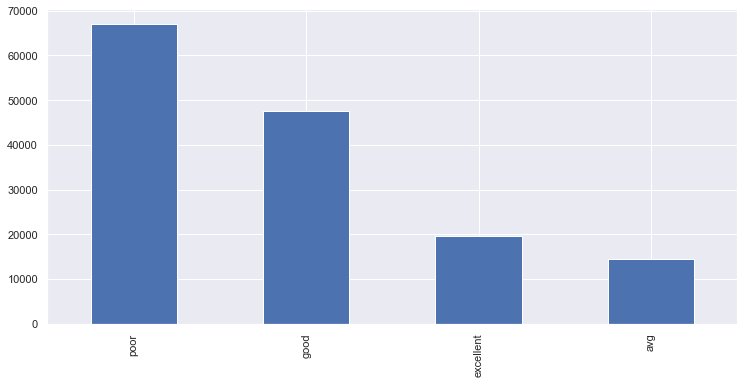

In [103]:
data['bins'].value_counts().plot(kind='bar')

In [104]:
import pandas as pd
import numpy as np

data= pd.get_dummies(data, columns=["bins"] )
data=data.drop(['Credit_Score'],axis=1)
# # merge with main df bridge_df on key values
# data = data.join(dum_df)
# data 
data

,loan_limit,loan_type,loan_purpose,rate_of_interest,property_value,income,LTV,term,age,dtir1,Status,bins_avg,bins_excellent,bins_good,bins_poor
0,cf,type1,p1,NaN,118000.0,1740.0,98.728814,360.0,25-34,45.0,1,0,0,1,0
1,cf,type2,p1,NaN,NaN,4980.0,NaN,360.0,55-64,NaN,1,0,0,0,1
2,cf,type1,p1,4.560,508000.0,9480.0,80.019685,360.0,35-44,46.0,0,0,0,1,0
3,cf,type1,p4,4.250,658000.0,11880.0,69.376900,360.0,45-54,42.0,0,0,0,0,1
4,cf,type1,p1,4.000,758000.0,10440.0,91.886544,360.0,25-34,39.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,type1,p3,3.125,608000.0,7860.0,71.792763,180.0,55-64,48.0,0,0,0,0,1
148666,cf,type1,p1,5.190,788000.0,7140.0,74.428934,360.0,25-34,15.0,0,0,0,0,1
148667,cf,type1,p4,3.125,728000.0,6900.0,61.332418,180.0,45-54,49.0,0,1,0,0,0
148668,cf,type1,p4,3.500,278000.0,7140.0,70.683453,180.0,55-64,29.0,0,0,0,1,0


In [105]:
data['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

<AxesSubplot:>

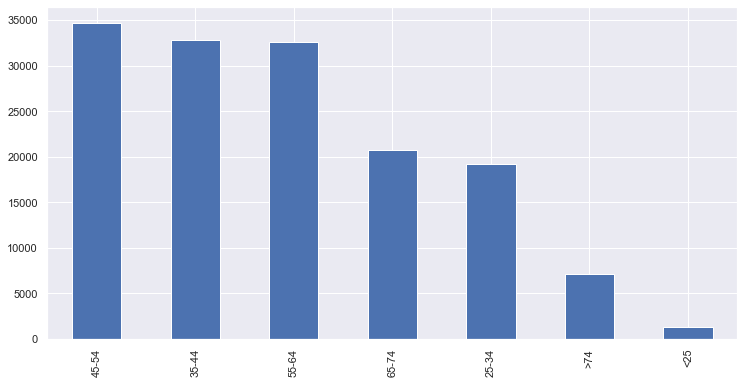

In [106]:
data['age'].value_counts().plot(kind='bar')

In [107]:
data['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [108]:
data['rate_of_interest'].isnull().sum()

36439

In [109]:
# data['age']=data['age'].fillna(data['age']).mode()[0]

In [110]:
data['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [111]:
data['age'].isnull().sum()

200

In [112]:
data['dtir1'].isnull().sum()

24121

In [113]:
data['dtir1'].value_counts()

37.0    6848
36.0    6553
44.0    6500
49.0    6309
43.0    5307
42.0    5121
41.0    4881
40.0    4699
39.0    4540
38.0    4461
45.0    4456
48.0    4405
30.0    4258
47.0    4236
31.0    4210
46.0    4112
35.0    2668
33.0    2655
32.0    2639
34.0    2588
20.0    2108
24.0    1817
29.0    1788
22.0    1781
28.0    1753
23.0    1740
26.0    1711
27.0    1675
25.0    1665
21.0    1617
60.0     832
54.0     832
57.0     823
59.0     812
55.0     798
53.0     787
51.0     783
52.0     777
58.0     757
50.0     752
56.0     746
61.0     692
16.0     439
8.0      433
19.0     430
13.0     421
6.0      420
17.0     415
11.0     400
18.0     396
9.0      395
14.0     393
10.0     386
5.0      386
12.0     383
15.0     381
7.0      379
Name: dtir1, dtype: int64

In [114]:
# data['dtir1']=data['dtir1'].fillna(data['dtir1']).median([0]
data['dtir1']=data['dtir1'].fillna(method="ffill") 




In [115]:
data.income.max()

578580.0

In [116]:
data['income']=data['income'].fillna(method="ffill")

In [117]:
data.isnull().sum()

loan_limit           3344
loan_type               0
loan_purpose          134
rate_of_interest    36439
property_value      15098
income                  0
LTV                 15098
term                   41
age                   200
dtir1                   0
Status                  0
bins_avg                0
bins_excellent          0
bins_good               0
bins_poor               0
dtype: int64

In [118]:
data['LTV']=data['LTV'].fillna(method="ffill")

In [119]:
data['property_value']=data['property_value'].fillna(method="ffill")

<AxesSubplot:>

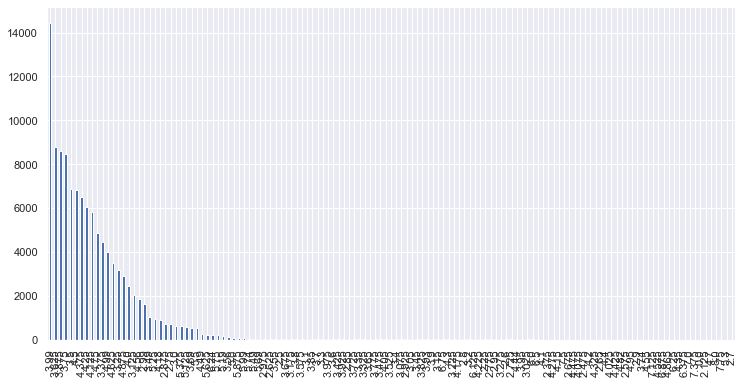

In [120]:
data['rate_of_interest'].value_counts().plot(kind='bar')

In [121]:
mean=np.nanmean(data['rate_of_interest'])
data['rate_of_interest']=np.where(data['rate_of_interest'],mean, data['rate_of_interest'])

In [122]:
data.isnull().sum()

loan_limit          3344
loan_type              0
loan_purpose         134
rate_of_interest       0
property_value         0
income                 0
LTV                    0
term                  41
age                  200
dtir1                  0
Status                 0
bins_avg               0
bins_excellent         0
bins_good              0
bins_poor              0
dtype: int64

In [123]:
data=data.dropna()

In [124]:
data.isna().sum()

loan_limit          0
loan_type           0
loan_purpose        0
rate_of_interest    0
property_value      0
income              0
LTV                 0
term                0
age                 0
dtir1               0
Status              0
bins_avg            0
bins_excellent      0
bins_good           0
bins_poor           0
dtype: int64

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144971 entries, 0 to 148669
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_limit        144971 non-null  object 
 1   loan_type         144971 non-null  object 
 2   loan_purpose      144971 non-null  object 
 3   rate_of_interest  144971 non-null  float64
 4   property_value    144971 non-null  float64
 5   income            144971 non-null  float64
 6   LTV               144971 non-null  float64
 7   term              144971 non-null  float64
 8   age               144971 non-null  object 
 9   dtir1             144971 non-null  float64
 10  Status            144971 non-null  int64  
 11  bins_avg          144971 non-null  uint8  
 12  bins_excellent    144971 non-null  uint8  
 13  bins_good         144971 non-null  uint8  
 14  bins_poor         144971 non-null  uint8  
dtypes: float64(6), int64(1), object(4), uint8(4)
memory usage: 13.8+ MB


In [126]:
import pandas as pd
import numpy as np

data= pd.get_dummies(data, columns=["loan_limit","loan_type","loan_purpose"] )
data

,rate_of_interest,property_value,income,LTV,term,age,dtir1,Status,bins_avg,bins_excellent,...,bins_poor,loan_limit_cf,loan_limit_ncf,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
0,4.045476,118000.0,1740.0,98.728814,360.0,25-34,45.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,4.045476,118000.0,4980.0,98.728814,360.0,55-64,45.0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,4.045476,508000.0,9480.0,80.019685,360.0,35-44,46.0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,4.045476,658000.0,11880.0,69.376900,360.0,45-54,42.0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4,4.045476,758000.0,10440.0,91.886544,360.0,25-34,39.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,4.045476,608000.0,7860.0,71.792763,180.0,55-64,48.0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
148666,4.045476,788000.0,7140.0,74.428934,360.0,25-34,15.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
148667,4.045476,728000.0,6900.0,61.332418,180.0,45-54,49.0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
148668,4.045476,278000.0,7140.0,70.683453,180.0,55-64,29.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [127]:
def age_profiling(x):
    if x == '45-54':
        return 6
    if x == '35-44':
        return 5
    if x == '55-64':
        return 4
    if x=='65-74':
        return 3
    if x== '25-34':
        return 2
    if x=='>74':
        return 1
    else:
        return 0

 
data['age']=data['age'].apply(age_profiling)     

In [128]:
data

,rate_of_interest,property_value,income,LTV,term,age,dtir1,Status,bins_avg,bins_excellent,...,bins_poor,loan_limit_cf,loan_limit_ncf,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
0,4.045476,118000.0,1740.0,98.728814,360.0,2,45.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,4.045476,118000.0,4980.0,98.728814,360.0,4,45.0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,4.045476,508000.0,9480.0,80.019685,360.0,5,46.0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,4.045476,658000.0,11880.0,69.376900,360.0,6,42.0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4,4.045476,758000.0,10440.0,91.886544,360.0,2,39.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,4.045476,608000.0,7860.0,71.792763,180.0,4,48.0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
148666,4.045476,788000.0,7140.0,74.428934,360.0,2,15.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
148667,4.045476,728000.0,6900.0,61.332418,180.0,6,49.0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
148668,4.045476,278000.0,7140.0,70.683453,180.0,4,29.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


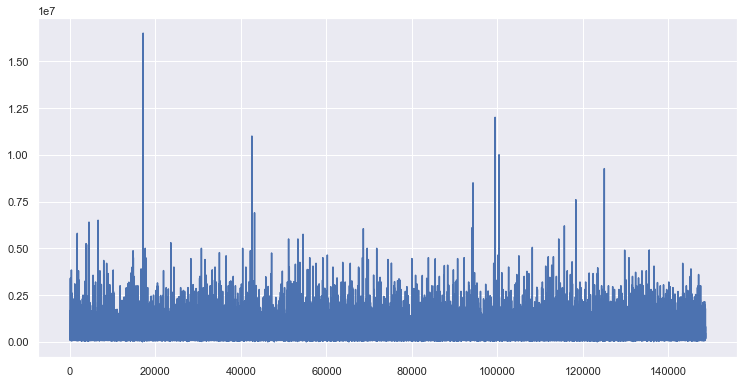

In [129]:
plt.plot(data['property_value'])

In [130]:
data['property_value'].describe()

count    1.449710e+05
mean     4.994327e+05
std      3.609796e+05
min      8.000000e+03
25%      2.780000e+05
50%      4.180000e+05
75%      6.280000e+05
max      1.650800e+07
Name: property_value, dtype: float64

In [131]:
def subset_by_iqr(df, column, whisker_width=1.5):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
data = subset_by_iqr(data, 'property_value', whisker_width=1.5)

In [132]:
data['property_value'].describe()

count    1.388150e+05
mean     4.479610e+05
std      2.289325e+05
min      8.000000e+03
25%      2.680000e+05
50%      4.080000e+05
75%      5.980000e+05
max      1.148000e+06
Name: property_value, dtype: float64

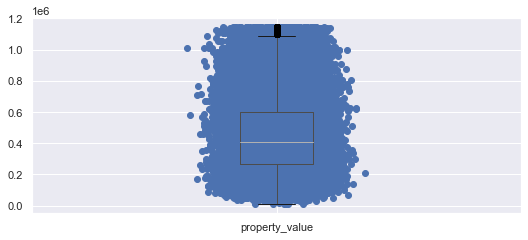

In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
da = pd.DataFrame(data['property_value'])
da.boxplot()
for i, d in enumerate(da):
   y = da[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(x, y)
plt.show()

In [134]:
data

,rate_of_interest,property_value,income,LTV,term,age,dtir1,Status,bins_avg,bins_excellent,...,bins_poor,loan_limit_cf,loan_limit_ncf,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
0,4.045476,118000.0,1740.0,98.728814,360.0,2,45.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,4.045476,118000.0,4980.0,98.728814,360.0,4,45.0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,4.045476,508000.0,9480.0,80.019685,360.0,5,46.0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,4.045476,658000.0,11880.0,69.376900,360.0,6,42.0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4,4.045476,758000.0,10440.0,91.886544,360.0,2,39.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,4.045476,608000.0,7860.0,71.792763,180.0,4,48.0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
148666,4.045476,788000.0,7140.0,74.428934,360.0,2,15.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
148667,4.045476,728000.0,6900.0,61.332418,180.0,6,49.0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
148668,4.045476,278000.0,7140.0,70.683453,180.0,4,29.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [135]:
result = data.groupby('Status').agg({'income': ['mean', 'min', 'max','count']})
result

income                       
               mean  min       max   count
Status                                    
0       6873.482189  0.0  374400.0  104934
1       6009.633718  0.0  322860.0   33881

In [136]:
result_r= data.groupby('Status').agg({'dtir1': ['mean', 'min', 'max','count']})
result_r

dtir1                   
             mean  min   max   count
Status                              
0       37.451045  5.0  61.0  104934
1       38.872170  5.0  61.0   33881

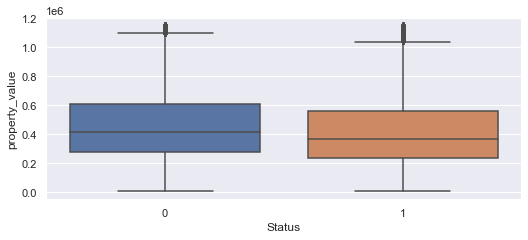

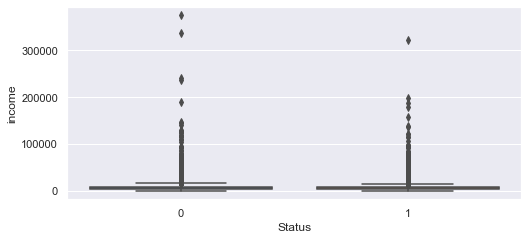

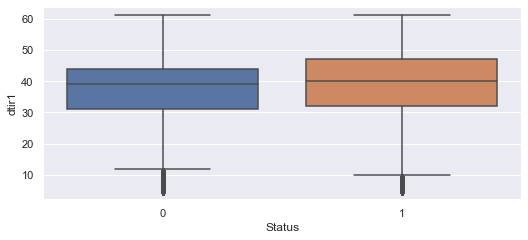

In [137]:

import seaborn as sns
labels=['property_value','income','dtir1']
for i in range(len(labels)):
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.boxplot(x=data["Status"], y=data[labels[i]], data=data)
    plt.show()

In [138]:
data

,rate_of_interest,property_value,income,LTV,term,age,dtir1,Status,bins_avg,bins_excellent,...,bins_poor,loan_limit_cf,loan_limit_ncf,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
0,4.045476,118000.0,1740.0,98.728814,360.0,2,45.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,4.045476,118000.0,4980.0,98.728814,360.0,4,45.0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,4.045476,508000.0,9480.0,80.019685,360.0,5,46.0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,4.045476,658000.0,11880.0,69.376900,360.0,6,42.0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4,4.045476,758000.0,10440.0,91.886544,360.0,2,39.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,4.045476,608000.0,7860.0,71.792763,180.0,4,48.0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
148666,4.045476,788000.0,7140.0,74.428934,360.0,2,15.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
148667,4.045476,728000.0,6900.0,61.332418,180.0,6,49.0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
148668,4.045476,278000.0,7140.0,70.683453,180.0,4,29.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [139]:
#performing hypothetical tests

In [140]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm.auto import tqdm
from scipy.stats import pearsonr
from scipy.stats import shapiro

In [141]:
shapiro(data.loc[data['Status']==1,'income'])

ShapiroResult(statistic=0.5581729412078857, pvalue=0.0)

In [142]:
grp_1=data.loc[data['Status']==0,'income']
grp_2=data.loc[data['Status']==1,'income']
print(np.var(grp_1), np.var(grp_2))

27013157.59818754 36865423.86453884


In [143]:
grp_1=data.loc[data['Status']==0,'dtir1']
grp_2=data.loc[data['Status']==1,'dtir1']
print(np.var(grp_1), np.var(grp_2))

100.68128557300335 137.70199726460373


In [144]:
27013157/36865423

0.7327504963119507

In [145]:
import scipy.stats as stats
import numpy as np

In [146]:
grp_1=data.loc[data['Status']==0,'property_value']
grp_2=data.loc[data['Status']==1,'property_value']
print(mannwhitneyu(grp_1,grp_2))

MannwhitneyuResult(statistic=1996086377.5, pvalue=2.2559561123971275e-254)


In [147]:
grp_1=data.loc[data['Status']==0,'income']
grp_2=data.loc[data['Status']==1,'income']
print(mannwhitneyu(grp_1,grp_2))

MannwhitneyuResult(statistic=2088846337.0, pvalue=0.0)


In [148]:
grp_1=data.loc[data['Status']==0,'dtir1']
grp_2=data.loc[data['Status']==1,'dtir1']
print(mannwhitneyu(grp_1,grp_2))

MannwhitneyuResult(statistic=1609331701.0, pvalue=5.442706588592588e-152)


In [149]:
data

,rate_of_interest,property_value,income,LTV,term,age,dtir1,Status,bins_avg,bins_excellent,...,bins_poor,loan_limit_cf,loan_limit_ncf,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
0,4.045476,118000.0,1740.0,98.728814,360.0,2,45.0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,4.045476,118000.0,4980.0,98.728814,360.0,4,45.0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
2,4.045476,508000.0,9480.0,80.019685,360.0,5,46.0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,4.045476,658000.0,11880.0,69.376900,360.0,6,42.0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4,4.045476,758000.0,10440.0,91.886544,360.0,2,39.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,4.045476,608000.0,7860.0,71.792763,180.0,4,48.0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
148666,4.045476,788000.0,7140.0,74.428934,360.0,2,15.0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
148667,4.045476,728000.0,6900.0,61.332418,180.0,6,49.0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
148668,4.045476,278000.0,7140.0,70.683453,180.0,4,29.0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [150]:
X=data.loc[:, data.columns != 'Status']
y=data['Status']

In [151]:
import xgboost as xgb
data_dmatrix=xgb.DMatrix(data=X,label=y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [152]:
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [153]:
y_pred = xgb_clf.predict(X_test)   

In [154]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8297


In [155]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123) 

xgb_cv.head()




,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.628557,0.003121,0.626911,0.004446
1,0.643895,0.003288,0.642546,0.005477
2,0.656424,0.004636,0.654347,0.003474
3,0.661986,0.005339,0.659205,0.006312
4,0.671604,0.009969,0.669411,0.010021


In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,shuffle=True,random_state=5)
model=xgb.XGBClassifier()
results=cross_val_score(model,X,y,cv=kfold)
print("Accuracy: %.2f%% " % (results.mean()*100))


Accuracy: 83.00% 


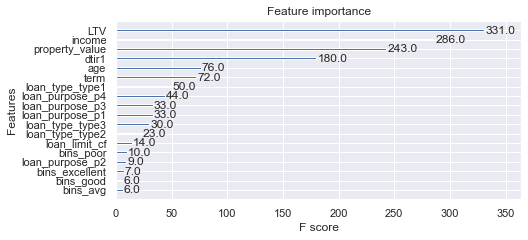

<Figure size 1152x864 with 0 Axes>

In [157]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show() 

In [158]:
import shap
shap.initjs()

In [161]:
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X)

In [171]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

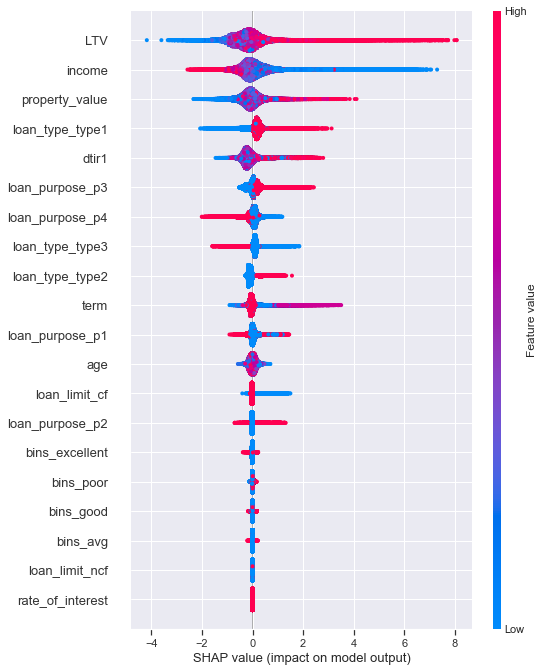

In [174]:
shap.summary_plot(shap_values, X)

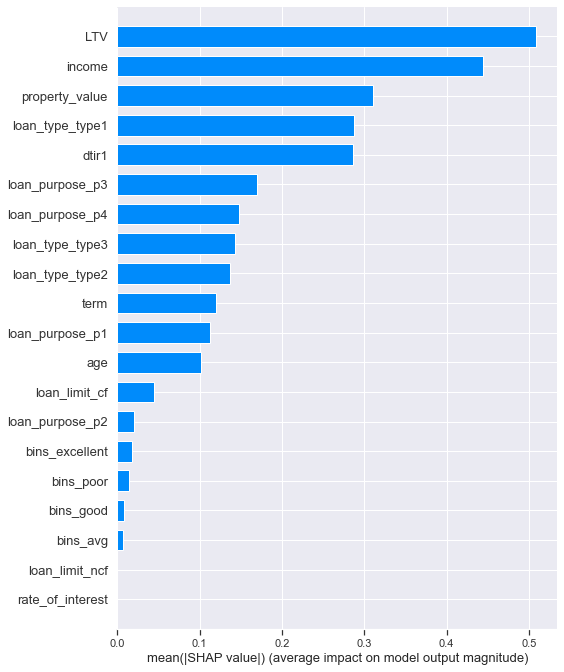

In [176]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [187]:
X_train

,rate_of_interest,property_value,income,LTV,term,age,dtir1,bins_avg,bins_excellent,bins_good,bins_poor,loan_limit_cf,loan_limit_ncf,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4
70122,4.045476,248000.0,3120.0,83.266129,360.0,6,45.0,0,0,1,0,1,0,0,1,0,0,0,1,0
79423,4.045476,218000.0,4200.0,85.550459,360.0,6,52.0,0,0,0,1,1,0,0,1,0,0,0,1,0
124205,4.045476,128000.0,2820.0,75.390625,180.0,6,61.0,0,0,0,1,1,0,0,1,0,0,0,0,1
115977,4.045476,898000.0,4980.0,53.062361,360.0,1,28.0,0,1,0,0,1,0,0,0,1,0,0,0,1
4491,4.045476,718000.0,8160.0,90.041783,360.0,5,49.0,0,0,1,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44923,4.045476,408000.0,2460.0,48.161765,360.0,1,52.0,0,0,1,0,1,0,1,0,0,0,0,1,0
104556,4.045476,698000.0,5760.0,59.670487,360.0,6,34.0,0,1,0,0,1,0,1,0,0,0,0,0,1
102736,4.045476,188000.0,5340.0,99.202128,360.0,1,44.0,0,0,1,0,1,0,1,0,0,1,0,0,0
126313,4.045476,148000.0,1560.0,71.959459,360.0,3,37.0,0,0,1,0,1,0,1,0,0,0,0,1,0
